# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to find cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes for city search
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Set up Lists to hold the response for latitude (lat) and longitude (lngs) and cities
lat_lngs = []
cities = []

# Create a set of random latitude and longitude combinations - For latitude: use "random.uniform" function and set the lower boundary as the lat_range's "zero" index value and upper boundary as the lat_range's "one" index value and set the size parameter to 1500 (# of cities). For longitude: repeat the same process using the "lng_range" values from the above cell 
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

# Use "zip" function to join the lats and lngs and be used as an iterator (lat_lngs) for looping to get the city names
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination - use "for loop" method to loop through the "citypy" module to find the nearest city based on the geo-coordinates (latitude, longitude combo)
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Get the url for weather check for each city in our list - use the "Built-in API request by city name" API:
    #https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
    # API call parameters:
        # city name  - use city from our "cities" list 
        # API key - use the "weather_api_key"
        # Unit - use "imperial" as unit to get temparatures in "Fahrenheit"

base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


# Build partial query URL with API key and units
query_url = f"{base_url}units={units}&appid={weather_api_key}&q="


# set up lists to hold the rquired reponse information for each city retrived from the API call
city_name = []
latitude = []
longitude =[]
temp_max = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
num_cities = 0

# Loop through the list of cities and perform a request (API call)  on each city for data. 
# Exception handling - use "Try & accept" code. "Try" will run the API call when there is no error (city found with all the listed data point) in the program Whereas the "except" will execute whenever the program encounters some error (e.g. city not found for a particular coordinate) in the preceding try block. As s result the prgramm will not halt because of some key or name error.

for city in cities:
    try:
        response = requests.get(query_url + city).json()   
        city_name.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        num_cities += 1
        print(f"Processing Record of city number {num_cities}: {city}")  
    except KeyError:
        print("city not found for this geo-coordinates")
        continue


Processing Record of city number 1: hobart
Processing Record of city number 2: rikitea
Processing Record of city number 3: ushuaia
Processing Record of city number 4: ilulissat
Processing Record of city number 5: airai
Processing Record of city number 6: ixtapa
Processing Record of city number 7: sitka
Processing Record of city number 8: mataura
Processing Record of city number 9: castro
Processing Record of city number 10: itarema
Processing Record of city number 11: upernavik
Processing Record of city number 12: gwadar
Processing Record of city number 13: codrington
Processing Record of city number 14: watertown
city not found for this geo-coordinates
Processing Record of city number 15: vardo
Processing Record of city number 16: lorengau
Processing Record of city number 17: tunceli
Processing Record of city number 18: krasnogorskoye
Processing Record of city number 19: cockburn town
city not found for this geo-coordinates
Processing Record of city number 20: ahipara
Processing Recor

Processing Record of city number 166: bluff
Processing Record of city number 167: paamiut
Processing Record of city number 168: saint george
Processing Record of city number 169: faanui
Processing Record of city number 170: talgar
Processing Record of city number 171: kushmurun
Processing Record of city number 172: barrow
Processing Record of city number 173: galeana
Processing Record of city number 174: farmington
Processing Record of city number 175: arraial do cabo
Processing Record of city number 176: dingle
Processing Record of city number 177: acambay
Processing Record of city number 178: husavik
Processing Record of city number 179: port macquarie
Processing Record of city number 180: kautokeino
Processing Record of city number 181: ancud
Processing Record of city number 182: coquimbo
Processing Record of city number 183: palana
Processing Record of city number 184: cape town
Processing Record of city number 185: tuatapere
Processing Record of city number 186: bambous virieux
Pr

Processing Record of city number 323: oranjemund
Processing Record of city number 324: kaffrine
Processing Record of city number 325: springdale
Processing Record of city number 326: kirensk
Processing Record of city number 327: hualmay
city not found for this geo-coordinates
Processing Record of city number 328: yulara
Processing Record of city number 329: fare
Processing Record of city number 330: dali
Processing Record of city number 331: ribeira grande
Processing Record of city number 332: kaitangata
Processing Record of city number 333: san andres
Processing Record of city number 334: faya
Processing Record of city number 335: troitsko-pechorsk
Processing Record of city number 336: taltal
Processing Record of city number 337: flin flon
Processing Record of city number 338: novoagansk
Processing Record of city number 339: santa maria
Processing Record of city number 340: hamilton
Processing Record of city number 341: mount isa
Processing Record of city number 342: chokurdakh
Proces

Processing Record of city number 491: tabas
Processing Record of city number 492: havoysund
Processing Record of city number 493: hangha
Processing Record of city number 494: lompoc
Processing Record of city number 495: marawi
Processing Record of city number 496: nouadhibou
Processing Record of city number 497: roseburg
Processing Record of city number 498: alta floresta
Processing Record of city number 499: zhigansk
Processing Record of city number 500: chaozhou
Processing Record of city number 501: zhob
city not found for this geo-coordinates
Processing Record of city number 502: mudbidri
Processing Record of city number 503: rafaela
Processing Record of city number 504: cetate
Processing Record of city number 505: murgab
Processing Record of city number 506: ankang
Processing Record of city number 507: arlit
Processing Record of city number 508: bonavista
Processing Record of city number 509: sangar
Processing Record of city number 510: kabare
Processing Record of city number 511: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dataframe from the data collected from the city API CALL (city_name, lat, lang, temp_max, humidity, cloudiness, wind_speed, country and date ) -  first convert the API call data into dictionary: set the column names as "key" and pass the API call data lists as "values". Then use the "pd.DataFrame" function to convet it into a data frame   
city_dict = {
    "City": city_name,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp (F)": temp_max,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness,
    "Wind Speed (mph)": wind_speed,
    "Country": country,
    "Date": date}

city_data_df = pd.DataFrame(city_dict)
city_data_df  
    

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Hobart,-42.8794,147.3294,55.26,96,100,17.27,AU,1666721697
1,Rikitea,-23.1203,-134.9692,72.91,77,70,20.85,PF,1666721697
2,Ushuaia,-54.8000,-68.3000,47.82,49,0,6.91,AR,1666721698
3,Ilulissat,69.2167,-51.1000,28.42,93,75,3.44,GL,1666721698
4,Airai,-8.9266,125.4092,62.26,93,100,1.34,TL,1666721699
...,...,...,...,...,...,...,...,...,...
580,Maceió,-9.6658,-35.7353,85.44,65,20,18.41,BR,1666721880
581,Port Blair,11.6667,92.7500,80.17,82,37,5.79,IN,1666722106
582,Mel'nikovo,56.5558,84.0850,29.25,65,7,10.20,RU,1666722094
583,Royan,45.6285,-1.0281,66.78,63,100,6.51,FR,1666722107


In [5]:
# Export the city dataframe into a .csv, specify the path to save/ access it - saved in "output_data" folder as "cities.csv" file
city_data_df.to_csv("output_data/cities.csv")


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

ZERO CITIES FOUND

In [6]:
#  Get the indices of cities that have humidity over 100% by using "count" function on humidity column- no city has more than 100% humidity
humid_cities = city_data_df[city_data_df["Humidity (%)"]>100].count()
humid_cities


City                0
Lat                 0
Lng                 0
Max Temp (F)        0
Humidity (%)        0
Cloudiness (%)      0
Wind Speed (mph)    0
Country             0
Date                0
dtype: int64

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#clean_city_data = city_data_df.drop(index=(humid_cities), inplace=False)
#clean_city_data

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

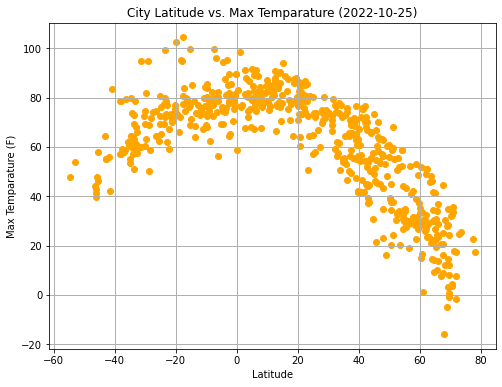

In [18]:
# Set plot values
# For x_axis value, use "lat" column AND y_axis values, use "Max Temp" column from the city_data_df
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp (F)"]

# Set the "current" date of analysis - use the "datetime.now().date()" function of the datetime 
current_date = str(datetime.now().date())

# Set the figure size, title, x and y axis labels, and grid parameters for the plot
plt.figure(figsize=(8,6))
plt.title("City Latitude vs. Max Temparature (" + current_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temparature (F)")
plt.grid(visible=True, which='major', axis='both', linestyle='-', linewidth=1)

# Create the scatter plot
plt.scatter(x_values, y_values, color="orange")

# Save the scatter plot in the "image" folder as figure_1
plt.savefig("images/figure_1.png")

# Show the plot
plt.show()



## Latitude vs. Humidity Plot

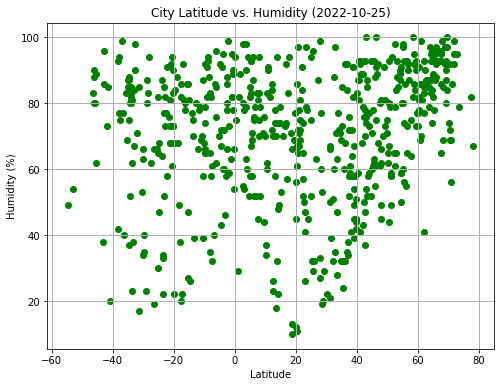

In [19]:
# Set plot values
# For x_axis value, use "lat" column AND y_axis values, use "Humidity" column from the city_data_df
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity (%)"]

# Set the "current" date of analysis - use the "datetime.now().date()" function of the datetime 
current_date = str(datetime.now().date())

# Set the figure size, title, x and y axis labels, and grid parameters for the plot
plt.figure(figsize=(8,6))
plt.title("City Latitude vs. Humidity (" + current_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(visible=True, which='major', axis='both', linestyle='-', linewidth=1)

# Create the scatter plot
plt.scatter(x_values, y_values, color="green")

# Save the scatter plot in the "image" folder as figure_2
plt.savefig("images/figure_2.png")

# Show the plot
plt.show()

## Latitude vs. Cloudiness Plot

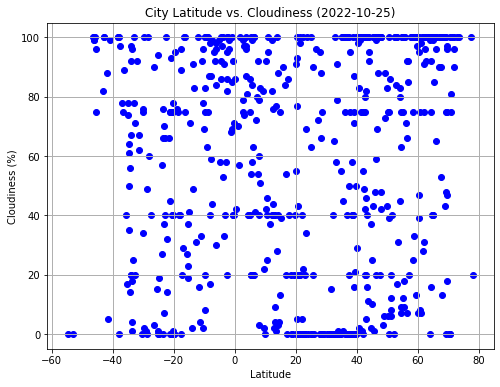

In [20]:
# Set plot values
# For x_axis value, use "lat" column AND y_axis values, use "Cloudiness" column from the city_data_df
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness (%)"]

# Set the "current" date of analysis - use the "datetime.now().date()" function of the datetime 
current_date = str(datetime.now().date())

# Set the figure size, title, x and y axis labels, and grid parameters for the plot
plt.figure(figsize=(8,6))
plt.title("City Latitude vs. Cloudiness (" + current_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(visible=True, which='major', axis='both', linestyle='-', linewidth=1)

# Create the scatter plot
plt.scatter(x_values, y_values, color="blue")

# Save the scatter plot in the "image" folder as figure_3
plt.savefig("images/figure_3.png")

# Show the plot
plt.show()


## Latitude vs. Wind Speed Plot

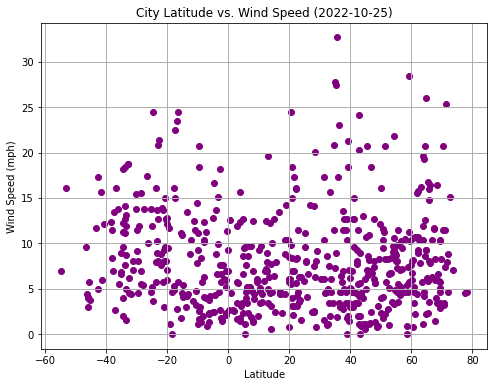

In [21]:
# Set plot values
# For x_axis value, use "lat" column AND y_axis values, use "Wind Speed" column from the city_data_df
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed (mph)"]

# Set the "current" date of analysis - use the "datetime.now().date()" function of the datetime 
current_date = str(datetime.now().date())

# Set the figure size, title, x and y axis labels, and grid parameters for the plot
plt.figure(figsize=(8,6))
plt.title("City Latitude vs. Wind Speed (" + current_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(visible=True, which='major', axis='both', linestyle='-', linewidth=1)

# Create the scatter plot
plt.scatter(x_values, y_values, color="purple")

# Save the scatter plot in he "image" folder as figure_4
plt.savefig("images/figure_4.png")

# Show the plot
plt.show()


## Linear Regression

In [22]:
# Separate the dataframe into northern and southern hemisphere dataframe - use "loc" function on "lat" column to filter northern (lattitude greater than or equal to zero) and southern hemisphere (lattitude less than zero) 
northern_hemisphere_df = city_data_df.loc[city_data_df["Lat"]>=0]
northern_hemisphere_df

southern_hemisphere_df = city_data_df.loc[city_data_df["Lat"]<0]
southern_hemisphere_df


,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Hobart,-42.8794,147.3294,55.26,96,100,17.27,AU,1666721697
1,Rikitea,-23.1203,-134.9692,72.91,77,70,20.85,PF,1666721697
2,Ushuaia,-54.8000,-68.3000,47.82,49,0,6.91,AR,1666721698
4,Airai,-8.9266,125.4092,62.26,93,100,1.34,TL,1666721699
7,Mataura,-46.1927,168.8643,39.63,88,100,3.02,NZ,1666721701
...,...,...,...,...,...,...,...,...,...
561,Moyobamba,-6.0500,-76.9667,82.20,62,84,4.14,PE,1666722095
570,Contamana,-7.3333,-75.0167,99.63,32,99,3.91,PE,1666722099
577,Kang,-23.6752,22.7876,79.99,34,76,7.94,BW,1666722104
578,Pozo Colorado,-23.4923,-58.7972,99.48,22,0,7.92,PY,1666722104


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.87


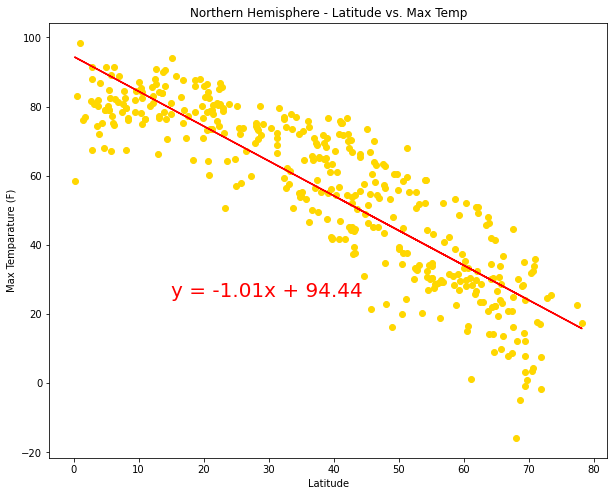

In [23]:
# Create data for linear regression equation
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Max Temp (F)"]

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Calculate " correlation_coefficient (r-value)" to show the relationship between the data and print it
correlation_coefficient = st.pearsonr(x_values, y_values)
print(f"The r-value is: {round(correlation_coefficient[0],2)}")

# Create a string of the linear regression equation to be displyed on scatter plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with linear regression
plt.figure(figsize=(10,8))
plt.scatter(x_values, y_values, color="gold")
plt.plot(x_values,regress_values,"r-")

# Add ("annotate") the linear regression equation to the plot
plt.annotate(line_eq,(15,25),fontsize=20,color="red")

# Set the figure size, title for the plot, labels for x and y axis
plt.title("Northern Hemisphere - Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temparature (F)")

# Save the scatter plot in he "image" folder as figure_5
plt.savefig("images/figure_5.png")

# Show the plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.62


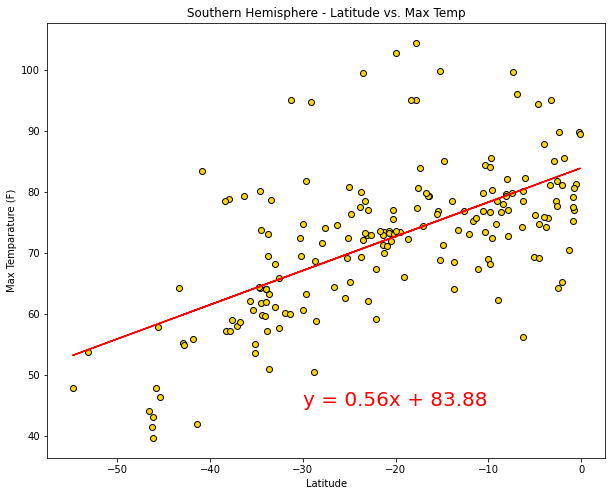

In [24]:
# Create data for linear regression equation
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Max Temp (F)"]

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Calculate " correlation_coefficient (r-value)" to show the relationship between the data and print it
correlation_coefficient = st.pearsonr(x_values, y_values)
print(f"The r-value is: {round(correlation_coefficient[0],2)}")

# Create a string of the linear regression equation to be displyed on scatter plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with linear regression
plt.figure(figsize=(10,8))
plt.scatter(x_values, y_values, color="gold", edgecolor="black")
plt.plot(x_values,regress_values,"r-")

# Add ("annotate") the linear regression equation to the plot
plt.annotate(line_eq,(-30,45),fontsize=20,color="red")

# Set the figure size, title for the plot, labels for x and y axis
plt.title("Southern Hemisphere - Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temparature (F)")

# Save the scatter plot in he "image" folder as figure_6
plt.savefig("images/figure_6.png")

# Show the plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.32


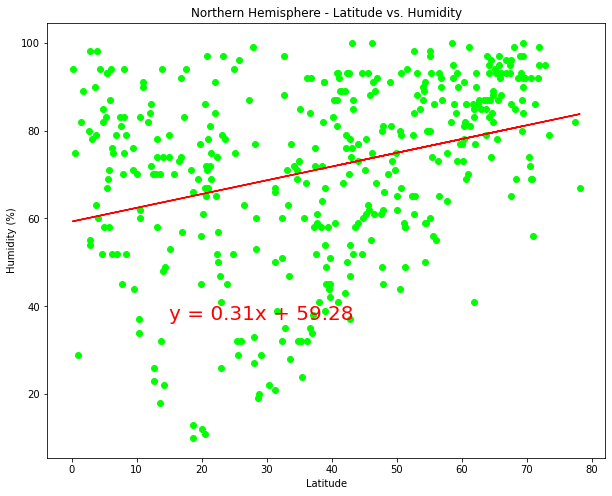

In [25]:
# Create data for linear regression equation
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Humidity (%)"]

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Calculate " correlation_coefficient (r-value)" to show the relationship between the data and print it
correlation_coefficient = st.pearsonr(x_values, y_values)
print(f"The r-value is: {round(correlation_coefficient[0],2)}")

# Create a string of the linear regression equation to be displyed on scatter plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with linear regression
plt.figure(figsize=(10,8))
plt.scatter(x_values, y_values, color="lime")
plt.plot(x_values,regress_values,"r-")

# Add ("annotate") the linear regression equation to the plot
plt.annotate(line_eq,(15,37),fontsize=20,color="red")

# Set the figure size, title for the plot, labels and limits for x and y axis
plt.title("Northern Hemisphere - Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the scatter plot in he "image" folder as figure_7
plt.savefig("images/figure_7.png")

# Show the plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05


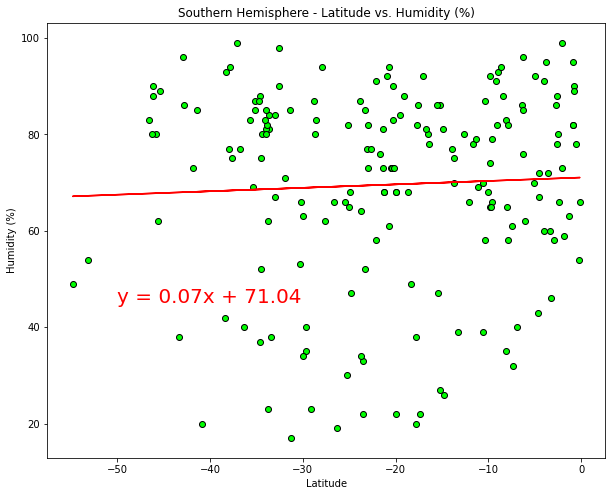

In [26]:
# Create data for linear regression equation
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Humidity (%)"]

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Calculate " correlation_coefficient (r-value)" to show the relationship between the data and print it
correlation_coefficient = st.pearsonr(x_values, y_values)
print(f"The r-value is: {round(correlation_coefficient[0],2)}")

# Create a string of the linear regression equation to be displyed on scatter plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with linear regression
plt.figure(figsize=(10,8))
plt.scatter(x_values, y_values, color="lime", edgecolor="black")
plt.plot(x_values,regress_values,"r-")

# Add ("annotate") the linear regression equation to the plot
plt.annotate(line_eq,(-50,45),fontsize=20,color="red")

# Set the figure size, title for the plot, labels for x and y axis
plt.title("Southern Hemisphere - Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the scatter plot in he "image" folder as figure_8
plt.savefig("images/figure_8.png")

# Show the plot
plt.show()

####  Northern Hemisphere - Latitude vs. Cloudiness (%)  Linear Regression

The r-value is: 0.2


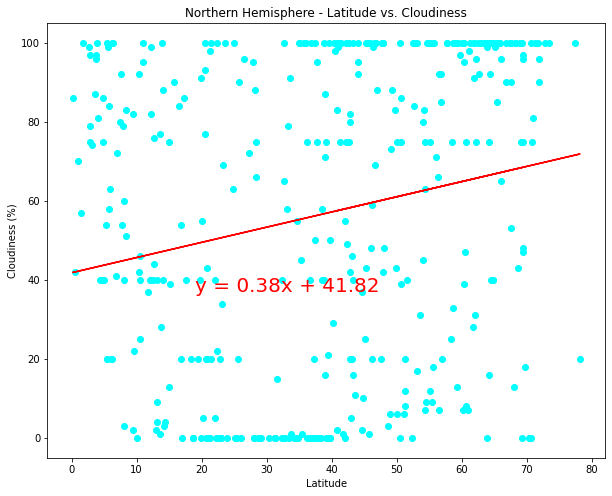

In [27]:
# Create data for linear regression equation
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Cloudiness (%)"]

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Calculate " correlation_coefficient (r-value)" to show the relationship between the data and print it
correlation_coefficient = st.pearsonr(x_values, y_values)
print(f"The r-value is: {round(correlation_coefficient[0],2)}")

# Create a string of the linear regression equation to be displyed on scatter plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with linear regression
plt.figure(figsize=(10,8))
plt.scatter(x_values, y_values, color="aqua")
plt.plot(x_values,regress_values,"r-")

# Add ("annotate") the linear regression equation to the plot
plt.annotate(line_eq,(19,37),fontsize=20,color="red")

# Set the figure size, title for the plot, labels for x and y axis
plt.title("Northern Hemisphere - Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the scatter plot in he "image" folder as figure_9
plt.savefig("images/figure_9.png")

# Show the plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1


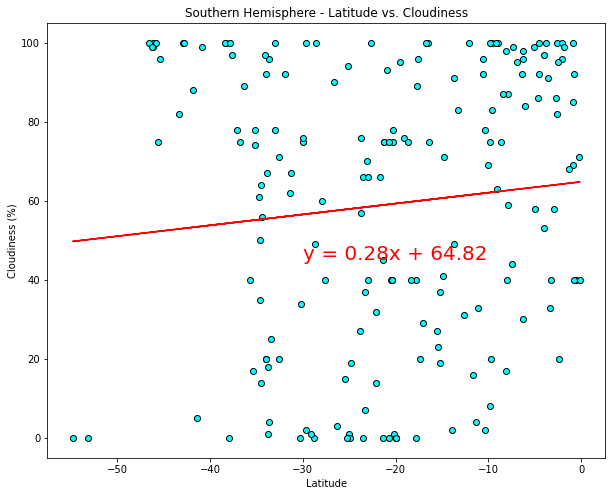

In [28]:
# Create data for linear regression equation
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Cloudiness (%)"]

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Calculate " correlation_coefficient (r-value)" to show the relationship between the data and print it
correlation_coefficient = st.pearsonr(x_values, y_values)
print(f"The r-value is: {round(correlation_coefficient[0],2)}")

# Create a string of the linear regression equation to be displyed on scatter plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with linear regression
plt.figure(figsize=(10,8))
plt.scatter(x_values, y_values, color="aqua", edgecolor="black")
plt.plot(x_values,regress_values,"r-")

# Add ("annotate") the linear regression equation to the plot
plt.annotate(line_eq,(-30,45),fontsize=20,color="red")

# Set the figure size, title for the plot, labels for x and y axis
plt.title("Southern Hemisphere - Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the scatter plot in he "image" folder as figure_10
plt.savefig("images/figure_10.png")

# Show the plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.13


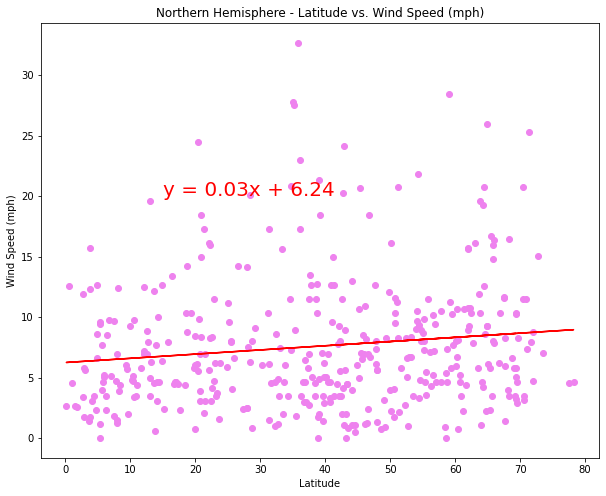

In [29]:
# Create data for linear regression equation
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Wind Speed (mph)"]

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Calculate " correlation_coefficient (r-value)" to show the relationship between the data and print it
correlation_coefficient = st.pearsonr(x_values, y_values)
print(f"The r-value is: {round(correlation_coefficient[0],2)}")

# Create a string of the linear regression equation to be displyed on scatter plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with linear regression
plt.figure(figsize=(10,8))
plt.scatter(x_values, y_values, color="violet")
plt.plot(x_values,regress_values,"r-")

# Add ("annotate") the linear regression equation to the plot
plt.annotate(line_eq,(15,20),fontsize=20,color="red")

# Set the figure size, title for the plot, labels for x and y axis
plt.title("Northern Hemisphere - Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the scatter plot in he "image" folder as figure_11
plt.savefig("images/figure_11.png")

# Show the plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.19


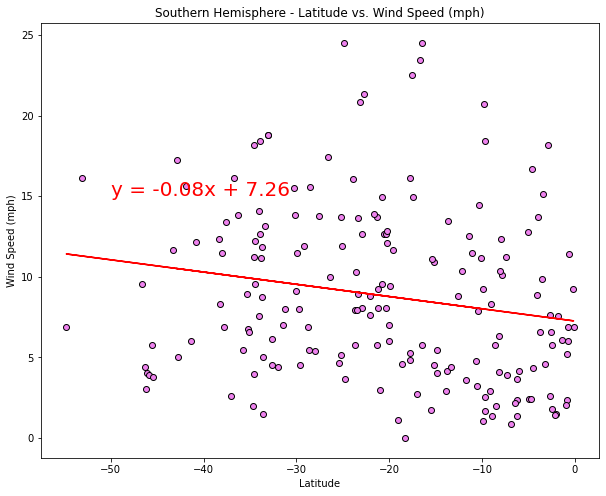

In [30]:
# Create data for linear regression equation
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Wind Speed (mph)"]

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Calculate " correlation_coefficient (r-value)" to show the relationship between the data and print it
correlation_coefficient = st.pearsonr(x_values, y_values)
print(f"The r-value is: {round(correlation_coefficient[0],2)}")

# Create a string of the linear regression equation to be displyed on scatter plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with linear regression
plt.figure(figsize=(10,8))
plt.scatter(x_values, y_values, color="violet", edgecolor="black")
plt.plot(x_values,regress_values,"r-")

# Add ("annotate") the linear regressionequation to the plot
plt.annotate(line_eq,(-50,15),fontsize=20,color="red")

# Set the figure size, title for the plot, labels for x and y axis
plt.title("Southern Hemisphere - Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the scatter plot in he "image" folder as figure_12
plt.savefig("images/figure_12.png")

# Show the plot
plt.show()

# OBSERVATIONS:

1.	Our data shows a clear relationship between latitude and temperature - temperatures are warmer approaching the Equator and cooler approaching the Poles (see Latitude vs Max Temp plot). This is further confirmed by the data for the two hemispheres. For northern hemisphere, temperature shows a strong negative correlation (r = -0.87) with the latitude whereas for southern hemisphere, temperature shows a strong positive correlation (r = 0.62) with the latitude (see northern Hemisphere Latitude vs Max Temp plot and Hemisphere Southern Hemisphere Latitude vs Max Temp plot). This observation is in accordance with the fact that as we move away from the equator towards the poles, the earth's surface becomes more angled to the incoming sunlight due to the spherical shape of the earth. Because of this, the intensity of sunlight received decreases as we move from the equator to poles. Hence, temperature decreases as we move towards the poles.  
2.	Our data shows no relationship between latitude and humidity as well as latitude and cloudiness (see Latitude vs Humidity plot and Latitude vs cloudiness). This is further confirmed by the two hemisphere’s plot and a close to zero correlation coefficient values (r value).
3.	Our data shows no relationship between latitude and wind speed (see Latitude vs Wind Speed plot). This is further confirmed by the two hemisphere’s plot and a close to zero correlation coefficient values (r value). This observation is in accordance with the “Coriolis effect” which states that latitude impacts direction of wind (counterclockwise in the Northern Hemisphere and clockwise in the Southern Hemisphere) but not the speed of wind.